In [1]:
import  pandas as pd

In [2]:
data=pd.read_csv('data/gbm-data.csv')

In [3]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X,y=data.get_values()[:,1:],data.get_values()[:,0]

In [5]:
import sklearn
from  sklearn.cross_validation import train_test_split

/home/nanopro/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_tr,X_t,y_tr,y_t=train_test_split(X,y,test_size=0.8,random_state=241)

In [7]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
def predloglos(clf,x,y):
    v=np.array([])
    for i in clf.staged_decision_function(x):
        v=np.append(v,i)
    p=1/(1+np.exp(-v))
    ls=np.array([])
    pv=p.reshape(p.size/float(y.size),y.size)
    for pvv in pv:
        ls=np.append(ls,sklearn.metrics.log_loss(y,pvv))
    return ls

learning rate =  1.0


/home/nanopro/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.582294259428
0
learning rate =  0.5
0.558202552316
6
learning rate =  0.3
0.542314111002
10
learning rate =  0.2
0.531450796319
36
learning rate =  0.1
0.526920187228
51


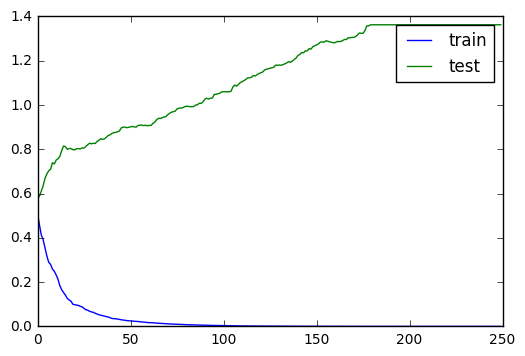

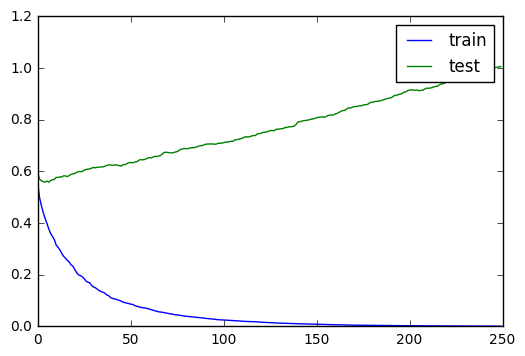

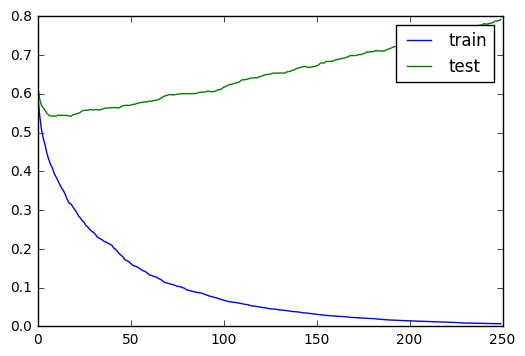

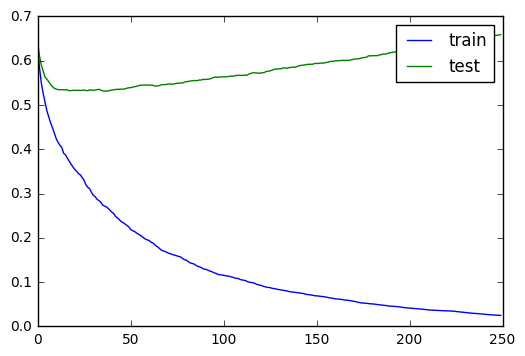

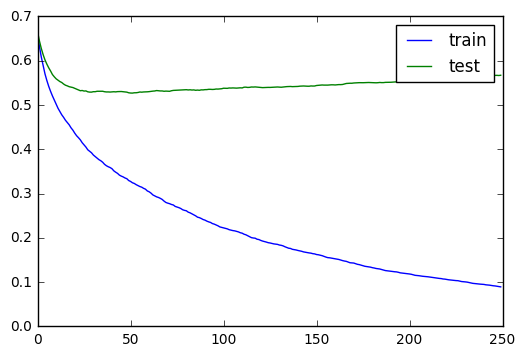

In [60]:
lrs=np.array([1, 0.5, 0.3, 0.2, 0.1] )
for i,lr in enumerate(lrs):
    clf=GradientBoostingClassifier(learning_rate=lr, n_estimators=250, verbose=False, random_state=241)
    clf.fit(X_tr,y_tr)
    figure(i)
    print 'learning rate = ',lr
    plot(predloglos(clf,X_tr,y_tr),label='train')
    plot(predloglos(clf,X_t,y_t),label='test')
    print predloglos(clf,X_t,y_t).min()
    print predloglos(clf,X_t,y_t).argmin()
    legend()

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clfR=RandomForestClassifier(n_estimators=250,random_state=241)
clfR.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=1, oob_score=False, random_state=241,
            verbose=0, warm_start=False)

In [95]:
sklearn.metrics.log_loss(y_t, clfR.predict_proba(X_t)[:,1])

0.52445221600093805